In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [8]:
df = pd.read_csv("../datasets/advertising.csv")

In [9]:
df['Ventas'] = df['Ventas']*100

In [10]:
df

,Facebook_Ads,Google_Ads,Radio,Ventas
0,230.10,37.80,69.20,2210.00
1,44.50,39.30,45.10,1040.00
2,17.20,45.90,69.30,1200.00
3,151.50,41.30,58.50,1650.00
4,180.80,10.80,58.40,1790.00
...,...,...,...,...
195,38.20,3.70,13.80,760.00
196,94.20,4.90,8.10,1400.00
197,177.00,9.30,6.40,1480.00
198,283.60,42.00,66.20,2550.00


In [11]:
df.describe()

,Facebook_Ads,Google_Ads,Radio,Ventas
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,1513.05
std,85.85,14.85,21.78,528.39
min,0.70,0.00,0.30,160.00
25%,74.38,9.97,12.75,1100.00
50%,149.75,22.90,25.75,1600.00
75%,218.82,36.52,45.10,1905.00
max,296.40,49.60,114.00,2700.00


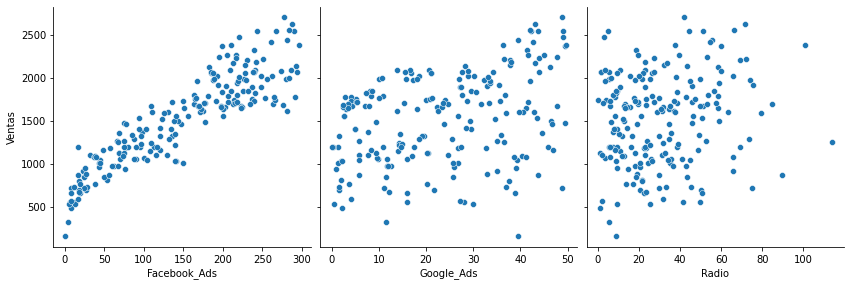

In [12]:
sns.pairplot(df,x_vars=['Facebook_Ads','Google_Ads','Radio'], y_vars='Ventas', height=4, aspect=1)

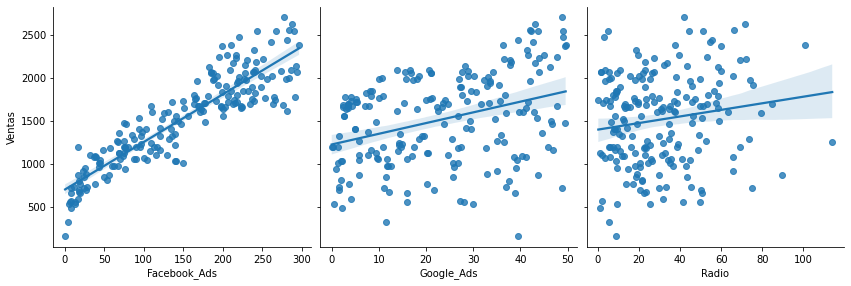

In [13]:
sns.pairplot(df,x_vars=['Facebook_Ads','Google_Ads','Radio'], y_vars='Ventas', height=4, aspect=1, kind='reg')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


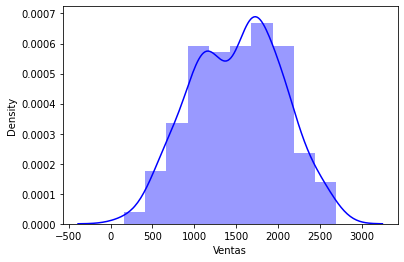

In [14]:
sns.distplot(df.Ventas, bins=10, color='blue', hist=True)

In [15]:
model = smf.ols(formula='Ventas ~ Facebook_Ads + Google_Ads + Radio', data=df)

In [17]:
resultado = model.fit()

In [18]:
print(resultado.params)

Intercept      462.51
Facebook_Ads     5.44
Google_Ads      10.70
Radio            0.03
dtype: float64


In [19]:
print(resultado.summary)

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7f0a17d5d3d0>>


# Ventas = 462.51 + (5.44)Facebook_Ads + (10.70)Google_Ads + (0.03)Radio

In [20]:
!pip install pulp

     |████████████████████████████████| 41.2 MB 79 kB/s 


In [21]:
from pulp import *
prob = LpProblem("Optimizacion de presupuesto",LpMaximize)

/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1313: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


x - Facebook_Ads
y - Google_Ads
z - Radio

In [22]:
x = LpVariable("x",0,200)
y = LpVariable("y",0,500)
z = LpVariable("z",0,500)

In [23]:
prob += x + y +z <= 1000

In [24]:
prob += 462.51 + 5.44*x + 10.70*y + 0.03*z

In [25]:
status = prob.solve()
LpStatus[status]

'Optimal'

In [26]:
print(prob)

Optimizacion_de_presupuesto:
MAXIMIZE
5.44*x + 10.7*y + 0.03*z + 462.51
SUBJECT TO
_C1: x + y + z <= 1000

VARIABLES
x <= 200 Continuous
y <= 500 Continuous
z <= 500 Continuous



In [27]:
for v in prob.variables():
  print(v.name, "=", v.varValue)

x = 200.0
y = 500.0
z = 300.0


In [28]:
ventas_maximas = 462.51 + 5.44*200.0 + 10.70*500.0 + 0.03*300.0
ventas_maximas

6909.51

In [29]:
df.describe()

,Facebook_Ads,Google_Ads,Radio,Ventas
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,1513.05
std,85.85,14.85,21.78,528.39
min,0.70,0.00,0.30,160.00
25%,74.38,9.97,12.75,1100.00
50%,149.75,22.90,25.75,1600.00
75%,218.82,36.52,45.10,1905.00
max,296.40,49.60,114.00,2700.00
